In [1]:
%pylab inline
import pandas as pd
import seaborn as sns


Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv('Uber.csv')
data.head(2)

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11,40.7690,-73.9549,B02512
1,4/1/2014 0:17,40.7267,-74.0345,B02512


In [3]:
data['Date/Time'] = pd.to_datetime(data['Date/Time'], infer_datetime_format = True)
data.head()

,Date/Time,Lat,Lon,Base
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512


In [4]:
def dom(dt):
    return dt.day

data['dom'] = data['Date/Time'].map(dom)


In [7]:
def weekday(dt):
    return dt.weekday()

data['weekday'] = data['Date/Time'].map(weekday)

def hour(dt):
    return dt.hour

data['Hour'] = data['Date/Time'].map(hour)

data.tail(2)

,Date/Time,Lat,Lon,Base,dom,weekday,Hour
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30,2,23
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30,2,23


Text(0.5, 1.0, 'trips per DOM')

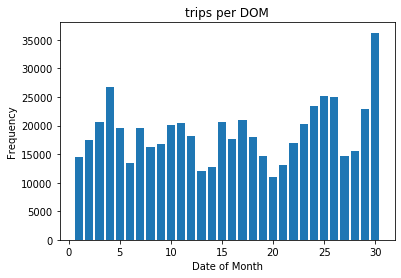

In [14]:
## Analysis 

hist(data.dom , bins = 30 , rwidth= 0.8, range =(0.5, 30.5))
xlabel('Date of Month')
ylabel('Frequency')
title('trips per DOM')

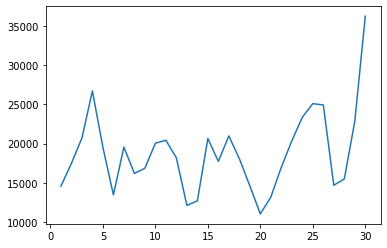

In [17]:
def count_rows(rows):
    return len(rows)

by_date = data.groupby('dom').apply(count_rows)
by_date

plot(by_date)
    


([<matplotlib.axis.XTick at 0x1f3916d3a90>,
 <a list of 30 Text xticklabel objects>)

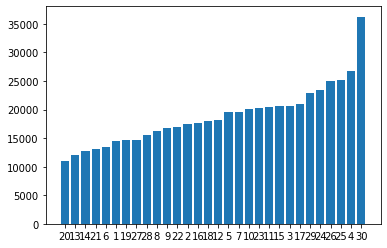

In [20]:
sorted_data = by_date.sort_values()
bar(range(1,31), sorted_data)
xticks(range(1,31), sorted_data.index)

([<matplotlib.axis.XTick at 0x1f397f5fb00>,
 <a list of 7 Text xticklabel objects>)

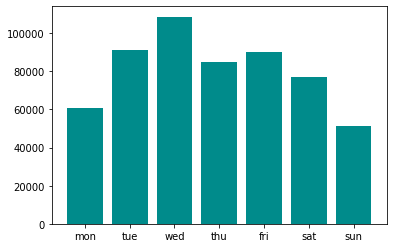

In [39]:
hist(data.weekday, bins = 7 , range= (-.5, 6.5) , rwidth= .8, color = '#008B8B')
xticks(range(7), 'mon tue wed thu fri sat sun'.split())

In [34]:
  data_hirch = data.groupby('weekday Hour'.split()).apply(count_rows).unstack()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,
0,518,261,238,571,1021,1619,2974,3888,3138,2211,...,3117,3818,4962,5574,4725,4386,3573,3079,1976,1091
1,765,367,304,516,887,1734,3766,5304,4594,2962,...,4489,6042,7521,8297,7089,6459,6310,5993,3614,1948
2,899,507,371,585,1003,1990,4230,5647,5242,3846,...,5438,7071,8213,9151,8334,7794,7783,6921,4845,2571
3,792,459,342,567,861,1454,3179,4159,3616,2654,...,4083,5182,6149,6951,6637,5929,6345,6585,5370,2909
4,1367,760,513,736,932,1382,2836,3943,3648,2732,...,4087,5354,6259,6790,7258,6247,5165,6265,6708,5393
5,3027,2479,1577,1013,706,704,844,1110,1372,1764,...,3042,4457,5410,5558,6165,5529,4792,5811,6493,5719
6,4542,2936,1590,1052,685,593,669,873,1233,1770,...,2934,3400,3489,3154,2795,2579,2276,2310,1639,1018
